In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [30]:
data = pd.read_csv('Amazon_Bestseller_Mobiles.csv')

In [31]:
data.head()

,Product Name,Ratings,No. of ratings,Price,Discount,Brand,Operating System,RAM,Storage capacity,Customer reviews,Rank,Link to product
0,"Samsung Galaxy M34 5G (Prism Silver,6GB,128GB)...",4.0 out of 5 stars,"12,600","12,499.",49%,Samsung,Android 13.0,6 GB,128 GB,"['good battery', 'good camera', 'fingerprint s...",1,https://amazon.in/Samsung-sAMOLED-Display-Batt...
1,"Redmi 13C 5G (Startrail Green, 4GB RAM, 128GB ...",4.0 out of 5 stars,"1,313","10,499.",25%,Redmi,"MIUI 14, Android 13.0",4 GB,128 GB,"['value for money', 'good performance', 'looks...",2,https://amazon.in/Redmi-Startrail-Storage-Medi...
2,"Redmi 13C 5G (Startrail Silver, 4GB RAM, 128GB...",4.0 out of 5 stars,941,"10,499.",25%,Redmi,"MIUI 14, Android 13.0",4 GB,128 GB,"['value for money', 'good performance', 'looks...",3,https://amazon.in/Redmi-Startrail-Storage-Medi...
3,"iQOO Z9x 5G (Tornado Green, 6GB RAM, 128GB Sto...",4.1 out of 5 stars,"1,040","14,499.",24%,iQOO,Funtouch OS 14 based on Android 14,6 GB,128 GB,"['good for gaming', 'fast charging', 'good per...",4,https://amazon.in/iQOO-Tornado-Storage-Snapdra...
4,"iQOO Z9x 5G (Storm Grey, 6GB RAM, 128GB Storag...",4.1 out of 5 stars,"1,040","14,499.",24%,iQOO,Funtouch OS 14 based on Android 14,6 GB,128 GB,"['good for gaming', 'fast charging', 'good per...",5,https://amazon.in/iQOO-Storage-Snapdragon-Batt...


In [32]:
data.dtypes

Product Name        object
Ratings             object
No. of ratings      object
Price               object
Discount            object
Brand               object
Operating System    object
RAM                 object
Storage capacity    object
Customer reviews    object
Rank                 int64
Link to product     object
dtype: object

In [33]:
data['Ratings'] = data['Ratings'].apply(lambda x : x.strip('out of 5 stars'))

In [34]:
data['Discount'] = data['Discount'].apply(lambda x : x.strip('%'))

In [35]:
data['RAM'] = data['RAM'].apply(lambda x : x.strip('GB'))

In [36]:
data['Storage capacity'] = data['Storage capacity'].apply(lambda x : x.strip('GB'))

In [37]:
data['No. of ratings'] = data['No. of ratings'].apply(lambda x : x.strip(' '))

In [38]:
data['Price'] = data['Price'].str.replace(',', '')

In [39]:
data['No. of ratings'] = data['No. of ratings'].str.replace(',', '')

In [40]:
data['Price'] = data['Price'].replace('.', '')

In [41]:
data['RAM'].replace('4 M', '4', inplace=True)

In [42]:
data.replace('', np.nan, inplace=True)

In [43]:
data.replace(' ', np.nan, inplace=True)

In [44]:
data.isnull().sum()

Product Name         0
Ratings              3
No. of ratings       3
Price                0
Discount             4
Brand                0
Operating System     0
RAM                  6
Storage capacity    14
Customer reviews     0
Rank                 0
Link to product      0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product Name      60 non-null     object
 1   Ratings           57 non-null     object
 2   No. of ratings    57 non-null     object
 3   Price             60 non-null     object
 4   Discount          56 non-null     object
 5   Brand             60 non-null     object
 6   Operating System  60 non-null     object
 7   RAM               54 non-null     object
 8   Storage capacity  46 non-null     object
 9   Customer reviews  60 non-null     object
 10  Rank              60 non-null     int64 
 11  Link to product   60 non-null     object
dtypes: int64(1), object(11)
memory usage: 5.8+ KB


In [46]:
data[['Ratings', 'Price', 'RAM', 'Storage capacity']] = data[['Ratings', 'Price', 'RAM', 'Storage capacity']].astype('float')

In [47]:
# float NaN can not be converted to int.
data[['No. of ratings', 'Discount']] = data[['No. of ratings', 'Discount']].astype('float')

In [48]:
data.dtypes

Product Name         object
Ratings             float64
No. of ratings      float64
Price               float64
Discount            float64
Brand                object
Operating System     object
RAM                 float64
Storage capacity    float64
Customer reviews     object
Rank                  int64
Link to product      object
dtype: object

In [49]:
# .transform(mean) calculates the mean ratings for each brand and assign that mean value to each incident of the
# brand in 'Rarings' column.
mean_ratings = data.groupby('Brand')['Ratings'].transform('mean')

In [50]:
# In place of NaN, the corresponding mean rating for the brand is filled.
data['Ratings'].fillna(mean_ratings, inplace=True)

In [51]:
mean_RAM = data.groupby('Brand')['RAM'].transform('mean')
data['RAM'].fillna(mean_RAM, inplace=True)

In [52]:
mean_Storage = data.groupby('Brand')['Storage capacity'].transform('mean')
data['Storage capacity'].fillna(mean_Storage, inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Samsung'),
  Text(1, 0, 'Redmi'),
  Text(2, 0, 'iQOO'),
  Text(3, 0, 'OnePlus'),
  Text(4, 0, 'POCO'),
  Text(5, 0, 'realme'),
  Text(6, 0, 'Nokia'),
  Text(7, 0, 'Xiaomi'),
  Text(8, 0, 'Motorola'),
  Text(9, 0, 'Jio')])

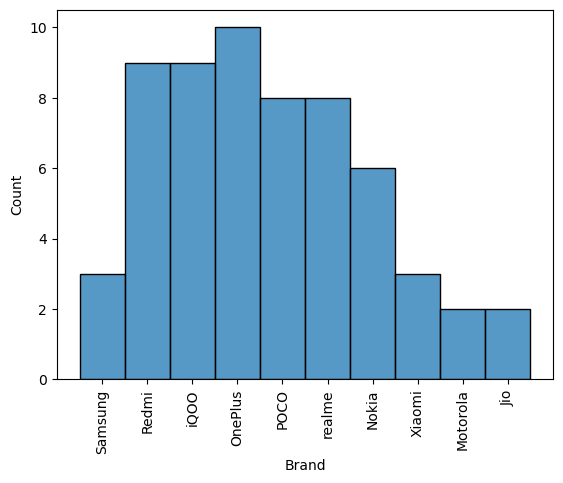

In [55]:
sns.histplot(data=data, x='Brand')
plt.xticks(rotation=90)

In [56]:
data.describe()

,Ratings,No. of ratings,Price,Discount,RAM,Storage capacity,Rank
count,60.000000,57.000000,60.000000,56.000000,58.000000,60.000000,60.000000
mean,4.026905,11587.894737,14285.666667,26.464286,10.793621,120.820872,40.500000
std,0.243477,32083.841658,9784.023795,10.869414,22.496343,74.644456,26.679199
min,3.000000,124.000000,999.000000,4.000000,0.030000,0.030000,1.000000
25%,3.975000,843.000000,8874.000000,19.000000,4.500000,73.214286,15.750000
50%,4.000000,2130.000000,12499.000000,25.000000,6.000000,128.000000,40.500000
75%,4.125000,5282.000000,19999.000000,32.000000,8.000000,153.600000,65.250000
max,4.600000,143122.000000,45999.000000,50.000000,128.000000,256.000000,80.000000


<Axes: xlabel='Price', ylabel='Ratings'>

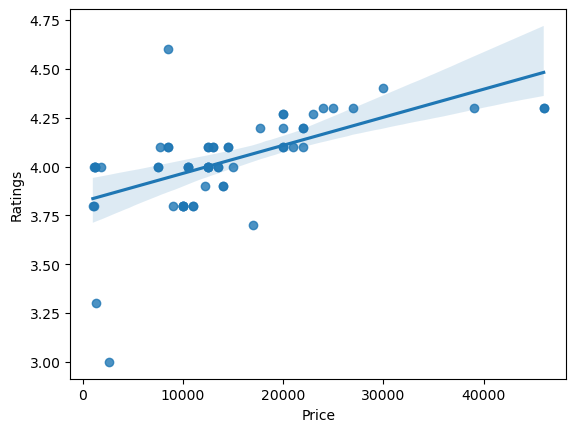

In [57]:
sns.regplot(data=data, x='Price', y='Ratings')

<Axes: xlabel='Storage capacity', ylabel='Price'>

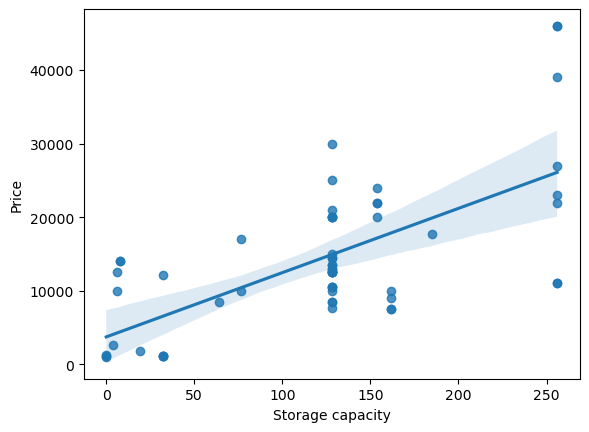

In [58]:
sns.regplot(data=data, x='Storage capacity', y='Price')

<Axes: xlabel='Storage capacity', ylabel='Ratings'>

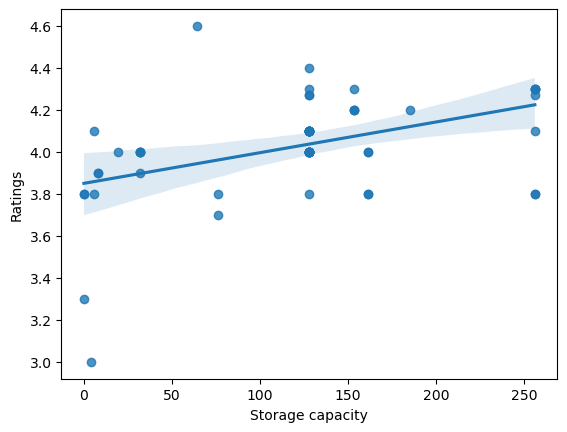

In [59]:
sns.regplot(data=data, x='Storage capacity', y='Ratings')

In [60]:
data_numerical = data.select_dtypes(exclude=['object'])
co = data_numerical.corr()
co

,Ratings,No. of ratings,Price,Discount,RAM,Storage capacity,Rank
Ratings,1.000000,0.012437,0.576953,-0.418672,-0.014926,0.448121,-0.102078
No. of ratings,0.012437,1.000000,-0.312996,-0.043687,-0.095183,-0.285145,-0.033345
Price,0.576953,-0.312996,1.000000,-0.361242,-0.038071,0.666507,0.067023
Discount,-0.418672,-0.043687,-0.361242,1.000000,0.211676,-0.207391,-0.181962
RAM,-0.014926,-0.095183,-0.038071,0.211676,1.000000,0.163792,0.042645
Storage capacity,0.448121,-0.285145,0.666507,-0.207391,0.163792,1.000000,0.090020
Rank,-0.102078,-0.033345,0.067023,-0.181962,0.042645,0.090020,1.000000


In [61]:
grouped_series = data.groupby('Brand')['Ratings'].mean()

In [62]:
mean_rating_df = grouped_series.reset_index()

In [63]:
# when we use groupby method, it return a series with header as the column on which data is grouped. It becomes
# difficult to convert it to dataframe with the column name as 'Brand' and further we can not plot it. Instead
# do following.
mean_rating_df

,Brand,Ratings
0,Jio,3.150000
1,Motorola,3.950000
2,Nokia,3.933333
3,OnePlus,4.271429
4,POCO,3.850000
5,Redmi,3.933333
6,Samsung,4.000000
7,Xiaomi,4.100000
8,iQOO,4.177778
9,realme,4.125000


Text(0.5, 1.0, 'Average rating of brands')

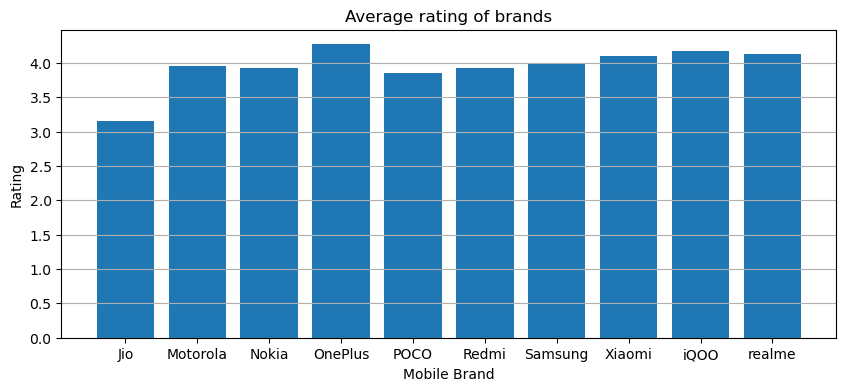

In [71]:
plt.figure(figsize=(10, 4))

plt.bar(mean_rating_df['Brand'], mean_rating_df['Ratings'])
plt.grid(True, axis='y')
plt.xlabel('Mobile Brand')
plt.ylabel('Rating')
plt.title('Average rating of brands')

In [66]:
grouped_price = data.groupby('Brand')['Price'].mean()

In [67]:
mean_price_df = grouped_price.reset_index()

In [68]:
mean_price_df

,Brand,Price
0,Jio,1949.000000
1,Motorola,6652.000000
2,Nokia,1265.666667
3,OnePlus,27568.900000
4,POCO,9499.000000
5,Redmi,12387.888889
6,Samsung,12499.000000
7,Xiaomi,8232.333333
8,iQOO,20221.000000
9,realme,15623.625000


Text(0.5, 1.0, 'Average price of brands')

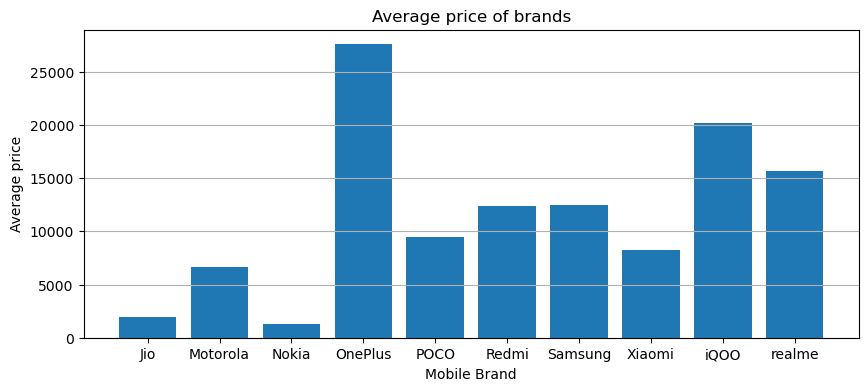

In [72]:
plt.figure(figsize=(10, 4))

plt.bar(mean_price_df['Brand'], mean_price_df['Price'])
plt.grid(True, axis='y')
plt.xlabel('Mobile Brand')
plt.ylabel('Average price')
plt.title('Average price of brands')


In [74]:
data['Customer reviews'] = data['Customer reviews'].apply(lambda x : x.strip('[]'))

In [75]:
grouped_reviews = data.groupby('Brand')['Customer reviews'].apply(list).reset_index()

In [76]:
grouped_reviews

,Brand,Customer reviews
0,Jio,"[Can't find reviews, Can't find reviews]"
1,Motorola,"['durable product', 'value for money', 'good p..."
2,Nokia,"['looks good', 'durable product', 'easy to use..."
3,OnePlus,"['fast charging', 'good speed', 'good camera',..."
4,POCO,"['value for money', 'looks good', 'good perfor..."
5,Redmi,"['value for money', 'good performance', 'looks..."
6,Samsung,"['good battery', 'good camera', 'fingerprint s..."
7,Xiaomi,"['value for money', 'good camera', 'good perfo..."
8,iQOO,"['good for gaming', 'fast charging', 'good per..."
9,realme,"['value for money', 'looks good', 'good perfor..."


<Figure size 1500x800 with 0 Axes>

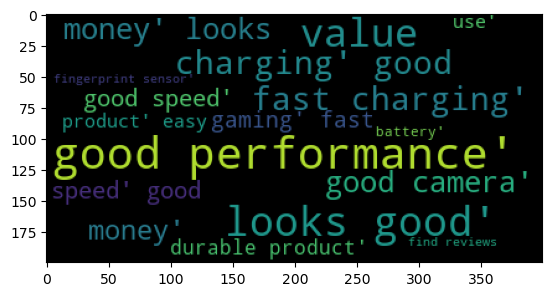

<Figure size 1500x800 with 0 Axes>

In [132]:
from wordcloud import WordCloud

reviews = ','.join(data['Customer reviews'].apply(lambda x : x.strip("[]")))
wordcloud = WordCloud().generate(reviews)

plt.imshow(wordcloud)
plt.figure(figsize=(15,8))